# Assigning additive DMS phenotypes to 10x data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
dfs = (pd.read_csv("data/10x/time_course/AV1/filtered_contig_annotations.csv"),
       pd.read_csv("data/10x/time_course/AV2/filtered_contig_annotations.csv"),
       pd.read_csv("data/10x/time_course/AV3/filtered_contig_annotations.csv")
       )
for i in range(3):
    dfs[i]['library'] = i + 1
df = pd.concat(dfs).reset_index(drop=True)

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,library
0,AAACCTGAGAATCTCC-1,True,AAACCTGAGAATCTCC-1_contig_1,True,503,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,544,35,clonotype1,clonotype1_consensus_2,2246,1
1,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,546,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPPTF,TGTCAGCAATATAACAGCTATCCTCCCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,690,50,clonotype1,clonotype1_consensus_2,1619,1
2,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,595,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,CARDFDVW,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,40,7,clonotype1,clonotype1_consensus_1,1619,1
3,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,710,48,clonotype1,clonotype1_consensus_2,35,1
4,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_2,True,549,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,CARDFDVW,TGTGCAAGGGACTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,128,9,clonotype1,clonotype1_consensus_1,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17463,TTTGTCAGTTCCGTCT-1,True,TTTGTCAGTTCCGTCT-1_contig_1,True,524,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYKSYPLTF,TGTCAGCAATATAAGAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAAATAAAAC,6792,296,clonotype460,clonotype460_consensus_1,1,3
17464,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_1,True,526,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGTTAGAAATAAAAC,1306,58,clonotype1,clonotype1_consensus_2,923,3
17465,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_2,True,689,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,CGRDFDVW,TGTGGAAGGGATTTCGATGTCTGG,GAGTTVTVSS,GGCGCAGGGACCACGGTCACCGTCTCCTCAG,106,10,clonotype1,clonotype1_consensus_1,923,3
17466,TTTGTCATCTTCATGT-1,True,TTTGTCATCTTCATGT-1_contig_1,True,545,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,CQQYNSYPLTF,TGTCAGCAATATAACAGCTATCCTCTCACGTTC,GSGTKLEIK,GGCTCGGGGACTAAGCTAGAGATAAAAC,2146,152,clonotype1,clonotype1_consensus_2,483,3


In [3]:
df.columns

Index(['barcode', 'is_cell', 'contig_id', 'high_confidence', 'length', 'chain',
       'v_gene', 'd_gene', 'j_gene', 'c_gene', 'full_length', 'productive',
       'fwr1', 'fwr1_nt', 'cdr1', 'cdr1_nt', 'fwr2', 'fwr2_nt', 'cdr2',
       'cdr2_nt', 'fwr3', 'fwr3_nt', 'cdr3', 'cdr3_nt', 'fwr4', 'fwr4_nt',
       'reads', 'umis', 'raw_clonotype_id', 'raw_consensus_id',
       'exact_subclonotype_id', 'library'],
      dtype='object')

### Barcode multiplicity

Most are multiplicity two, for paired heavy and light chains from single cells.

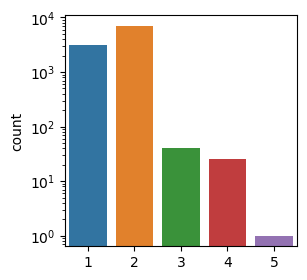

In [4]:
plt.figure(figsize=(3, 3))
sns.countplot(x=df.groupby("barcode").size())
plt.yscale("log")
plt.show()


Filter to only barcodes with multiplicity two.

In [5]:
df = df.groupby("barcode").filter(lambda x: len(x.index) == 2)

## Load DMS data

In [6]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,False,H-001
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,False,H-001
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,False,H-001
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,True,H-001
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,10.44756,...,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0,False,L-128
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,10.43023,...,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0,False,L-128
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,10.38231,...,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0,False,L-128


### Load naive sequence with IMGT numbering

In [7]:
pos_df = pd.read_csv("https://raw.githubusercontent.com/jbloomlab/Ab-CGGnaive_DMS/main/data/CGGnaive_sites.csv", dtype=dict(site=pd.Int16Dtype()), index_col="site_scFv")
pos_df

,amino_acid,chain,site,KI_codon,annotation
site_scFv,,,,,
1,E,H,1,GAG,FWRH1
2,V,H,2,GTG,FWRH1
3,Q,H,3,CAG,FWRH1
4,L,H,4,CTT,FWRH1
5,Q,H,5,CAG,FWRH1
...,...,...,...,...,...
231,L,L,124,CTA,FWRL4
232,E,L,125,GAA,FWRL4
233,I,L,126,ATA,FWRL4


In [8]:
naive_H = "".join(pos_df.query("chain == 'H'").amino_acid)
naive_H, len(naive_H)

('EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLEYMGYISYSGSTYYNPSLKSRISITRDTSKNQYYLQLNSVTTEDTATYYCARDFDVWGAGTTVTVSS',
 112)

In [9]:
# note extra R at end of scFv sequence, which we exclude below
naive_L = "".join(pos_df.query("chain == 'L'").amino_acid)[:-1]
naive_L, len(naive_L)

('DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKALIYSASYRYSGVPDRFTGSGSGTDFTLTISNVQSEDLAEYFCQQYNSYPLTFGSGTKLEIK',
 107)

### Add full length amino-acid sequence to the 10x data frame

In [10]:
df["aa_seq"] = df.fwr1 + df.cdr1 + df.fwr2 + df.cdr2 + df.fwr3 + df.cdr3 + df.fwr4

### Distribution of sequence lengths

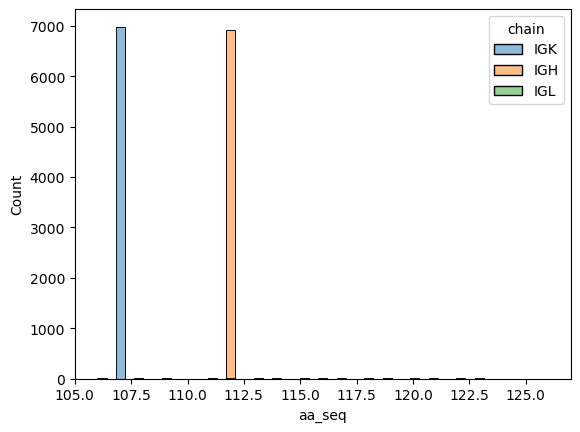

In [11]:
sns.histplot(x=df.aa_seq.str.len(), hue=df.chain)
# plt.yscale("log")
plt.show()

In [12]:
df.aa_seq.str.len().value_counts()

107    6981
112    6928
119      23
106      21
121      21
120      18
118      16
109      12
111      11
122      11
117      10
113      10
115       8
116       7
114       6
108       6
123       5
124       4
126       2
110       1
125       1
Name: aa_seq, dtype: int64

Filter to only sequences with the expected length of each chain

In [13]:
# Filter to only sequences with the expected length of each chain
df = df.loc[((df.chain == 'IGH') & (df.aa_seq.str.len() == len(naive_H))) | ((df.chain == 'IGK') & (df.aa_seq.str.len() == len(naive_L)))]

## Assign amino-acid mutations and additive phenotypes to 10x sequences

**Note**: we do not attempt to pair heavy and light chains from the same cell, so phenotypes are assigned to each chain independently.
Under an additive model, the values for each chain can be added to get the phenotype for the BCR

In [14]:
def get_mutations(naive_aa, aa, pos_map, chain_annotation):
    assert len(naive_aa) == len(aa)
    return [f"{aa1}{pos_map[pos]}{chain_annotation}{aa2}"
            for pos, (aa1, aa2) in enumerate(zip(naive_aa, aa))
            if aa1 != aa2]

In [15]:
pos_map_H = pos_df.loc[pos_df.chain == "H", "site"].reset_index(drop=True)
pos_map_L = pos_df.loc[pos_df.chain == "L", "site"].reset_index(drop=True)

In [16]:
for idx in df.index:
     if df.chain[idx] == "IGH":
          mutations = get_mutations(naive_H, df.aa_seq[idx], pos_map_H, "(H)")          
     elif df.chain[idx] == "IGK":
          mutations = get_mutations(naive_L, df.aa_seq[idx], pos_map_L, "(L)")
     else:
          print(f"skipping unexpected chain length {df.chain[idx]} {len(df.aa_seq[idx])}")
          continue

     df.loc[idx, "mutations"] = ",".join(mutations)
     df.loc[idx, "n_mutations"] = len(mutations)
     df.loc[idx, "delta_bind_CGG"] = dms_df.delta_bind_CGG[mutations].sum()
     df.loc[idx, "delta_expr"] = dms_df.delta_expr[mutations].sum()
     df.loc[idx, "delta_psr"] = dms_df.delta_psr[mutations].sum()

df.n_mutations = df.n_mutations.astype("Int64")

df

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,...,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id,library,aa_seq,mutations,n_mutations,delta_bind_CGG,delta_expr,delta_psr
1,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_1,True,546,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1,clonotype1_consensus_2,1619,1,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,"G80(L)E,L116(L)P",2,-0.84078,-0.72872,-0.06667
2,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,595,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,clonotype1,clonotype1_consensus_1,1619,1,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,,0,0.00000,0.00000,0.00000
3,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_1,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1,clonotype1_consensus_2,35,1,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,,0,0.00000,0.00000,0.00000
4,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_2,True,549,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,clonotype1,clonotype1_consensus_1,35,1,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,,0,0.00000,0.00000,0.00000
5,AAACCTGAGTGCGTGA-1,True,AAACCTGAGTGCGTGA-1_contig_1,True,525,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1,clonotype1_consensus_2,1,1,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,,0,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17462,TTTGTCACATACTACG-1,True,TTTGTCACATACTACG-1_contig_2,True,529,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1,clonotype1_consensus_2,559,3,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWHQQKPGQSPKA...,"A40(L)G,Y42(L)H,N108(L)K",3,1.58902,-0.50387,0.13111
17464,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_1,True,526,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1,clonotype1_consensus_2,923,3,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,A40(L)G,1,0.85566,0.00031,-0.19452
17465,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_2,True,689,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,clonotype1,clonotype1_consensus_1,923,3,EVQLQGSGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,"E6(H)G,S64(H)R,A105(H)G",3,1.25561,0.05877,0.43471
17466,TTTGTCATCTTCATGT-1,True,TTTGTCATCTTCATGT-1_contig_1,True,545,IGK,IGKV6-15,NaN,IGKJ4,IGKC,...,clonotype1,clonotype1_consensus_2,483,3,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,Y66(L)S,1,-0.77802,-0.03548,-0.24799


## Pair heavy and light seqs

In [17]:
df = df.query("chain == 'IGH'").merge(df.query("chain == 'IGK'"), on=["barcode", "library"], how="inner", suffixes=("_H", "_L"))

df["delta_bind_CGG"] = df.delta_bind_CGG_H + df.delta_bind_CGG_L
df["delta_expr"] = df.delta_expr_H + df.delta_expr_L
df["delta_psr"] = df.delta_psr_H + df.delta_psr_L
df["n_mutations"] = df.n_mutations_H + df.n_mutations_L

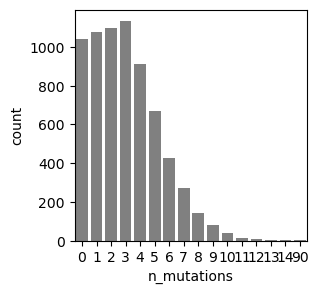

In [18]:
# plot mutation counts
plt.figure(figsize=(3, 3))
sns.countplot(x=df.n_mutations, color="grey")
plt.show()

In [19]:
assert set((df.aa_seq_H + df.aa_seq_L).str.len().unique()) == {len(naive_H) + len(naive_L)}

## Read metadata on mice/times

In [20]:
metadata = pd.read_excel("data/10x/time_course/AV_VDJ_GEX_metadata.xlsx")[["Unnamed: 0", "orig.ident", "Conditions", "Mouse.ID"]]
metadata["barcode"] = metadata["Unnamed: 0"].str.split("_").str[0]
metadata["library"] = metadata["orig.ident"].str[-1].astype(int)
metadata.drop(columns=["Unnamed: 0", "orig.ident"], inplace=True)
metadata

,Conditions,Mouse.ID,barcode,library
0,4_M1_Day14,M1,AAACCTGAGAATCTCC-1,1
1,2_M1_Day8,M1,AAACCTGAGCCGCCTA-1,1
2,3_M1_Day11,M1,AAACCTGAGTGCGTGA-1,1
3,5_M1_Day17,M1,AAACCTGCAAATACAG-1,1
4,20_M4_Day8,M4,AAACCTGCAGTACACT-1,1
...,...,...,...,...
9740,16_M3_Day14,M3,TTTGTCACACGACGAA-1,3
9741,15_M3_Day11,M3,TTTGTCACATACTACG-1,3
9742,15_M3_Day11,M3,TTTGTCAGTTCCGTCT-1,3
9743,23_M4_Day17,M4,TTTGTCATCATGGTCA-1,3


In [21]:
df = df.merge(metadata, how="left", on=["barcode", "library"])
df.rename(columns={"Mouse.ID": "mouse"}, inplace=True)
df

,barcode,is_cell_H,contig_id_H,high_confidence_H,length_H,chain_H,v_gene_H,d_gene_H,j_gene_H,c_gene_H,...,n_mutations_L,delta_bind_CGG_L,delta_expr_L,delta_psr_L,delta_bind_CGG,delta_expr,delta_psr,n_mutations,Conditions,mouse
0,AAACCTGAGATGTTAG-1,True,AAACCTGAGATGTTAG-1_contig_2,True,595,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,2,-0.84078,-0.72872,-0.06667,-0.84078,-0.72872,-0.06667,2,NaN,NaN
1,AAACCTGAGCCGCCTA-1,True,AAACCTGAGCCGCCTA-1_contig_2,True,549,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,2_M1_Day8,M1
2,AAACCTGAGTGCGTGA-1,True,AAACCTGAGTGCGTGA-1_contig_2,True,541,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,3_M1_Day11,M1
3,AAACCTGCAGTACACT-1,True,AAACCTGCAGTACACT-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,20_M4_Day8,M4
4,AAACCTGGTCCGACGT-1,True,AAACCTGGTCCGACGT-1_contig_1,True,671,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,1,0.85566,0.00031,-0.19452,0.85566,0.00031,-0.19452,1,3_M1_Day11,M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6898,TTTGGTTTCTTTCCTC-1,True,TTTGGTTTCTTTCCTC-1_contig_1,True,542,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,5,0.99405,0.17718,-0.29861,1.37620,0.15535,-0.34901,9,17_M3_Day17,M3
6899,TTTGTCACACGACGAA-1,True,TTTGTCACACGACGAA-1_contig_1,True,692,IGH,IGHV3-8,NaN,IGHJ1,IGHM,...,1,-0.02832,-0.05798,0.04810,0.22140,-0.26290,-0.37094,4,16_M3_Day14,M3
6900,TTTGTCACATACTACG-1,True,TTTGTCACATACTACG-1_contig_1,True,551,IGH,IGHV3-8,NaN,IGHJ1,IGHG1,...,3,1.58902,-0.50387,0.13111,0.82072,-0.64993,0.02096,5,15_M3_Day11,M3
6901,TTTGTCATCATGGTCA-1,True,TTTGTCATCATGGTCA-1_contig_2,True,689,IGH,IGHV3-8,NaN,IGHJ1,IGHG2C,...,1,0.85566,0.00031,-0.19452,2.11127,0.05908,0.24019,4,23_M4_Day17,M4


In [22]:
df.Conditions.value_counts(dropna=False)

NaN            1487
2_M1_Day8       459
20_M4_Day8      374
3_M1_Day11      373
8_M2_Day8       348
5_M1_Day17      314
21_M4_Day11     309
4_M1_Day14      281
14_M3_Day8      274
9_M2_Day11      256
10_M2_Day14     253
15_M3_Day11     249
16_M3_Day14     241
6_M1_Day20      236
11_M2_Day17     223
17_M3_Day17     219
18_M3_Day20     195
23_M4_Day17     191
22_M4_Day14     182
12_M2_Day20     160
24_M4_Day20     154
13_M3_Day5       75
7_M2_Day5        44
19_M4_Day5        3
1_M1_Day5         3
Name: Conditions, dtype: int64

Why are there so many `NaN` above? It seems there are barcodes missing in the metadata file.

In [23]:
df["mouse"].value_counts(dropna=False)

M1     1666
NaN    1487
M2     1284
M3     1253
M4     1213
Name: mouse, dtype: int64

In [24]:
df["time (days)"] = df.Conditions.str.split("Day").str[1]

In [25]:
order = sorted(df["time (days)"].dropna().unique(), key=lambda x: int(x))

In [26]:
df.groupby(["mouse", "time (days)"]).size()

mouse  time (days)
M1     11             373
       14             281
       17             314
       20             236
       5                3
       8              459
M2     11             256
       14             253
       17             223
       20             160
       5               44
       8              348
M3     11             249
       14             241
       17             219
       20             195
       5               75
       8              274
M4     11             309
       14             182
       17             191
       20             154
       5                3
       8              374
dtype: int64

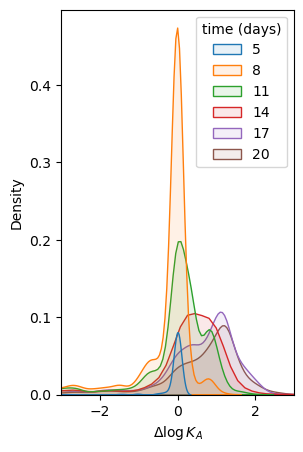

In [27]:
plt.figure(figsize=(3, 5))
sns.kdeplot(data=df, x="delta_bind_CGG", hue="time (days)", hue_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.6)
plt.xlim(-3, 3)
plt.xlabel("$\Delta\log K_A$")
plt.show()

/var/folders/0w/l84hyz3n6ns582pxy6tkt8y80000gn/T/ipykernel_63230/1966227532.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=df, kind="kde", x="delta_bind_CGG", hue="time (days)", row="mouse", hue_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.5, height=1.25, aspect=2.5, legend=False)


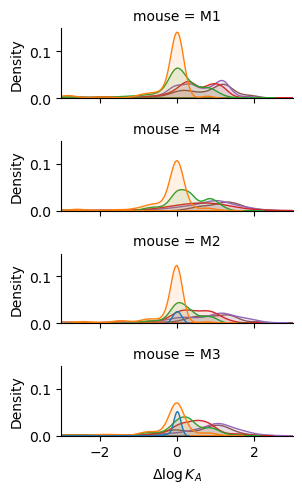

In [28]:
sns.displot(data=df, kind="kde", x="delta_bind_CGG", hue="time (days)", row="mouse", hue_order=order, fill=True, common_norm=True, alpha=0.1, bw_adjust=0.5, height=1.25, aspect=2.5, legend=False)
plt.xlim(-3, 3)
plt.xlabel("$\Delta\log K_A$")
plt.show()

## Write data frame to file

In [29]:
df.to_csv("output/10x/data.csv", index=False)